In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil
import pickle

In [2]:
with open("Dataset_After_Processing.pkl", "rb") as DS:
    Final_Preprocced_Data = pickle.load(DS)

In [3]:
X = []
Y = []
for i in range(len(Final_Preprocced_Data)):
    X.append(Final_Preprocced_Data[i][0])
    Y.append(Final_Preprocced_Data[i][1])

In [4]:
yy = set(Y)
Classes = sorted(list(yy))
ClassesCodes = {}
for i in range(len(Classes)):
    Class = Classes[i]
    ClassesCodes[Class] = np.array(i)

y = []
for i in range(len(Y)):
    Class = Y[i]
    y.append(ClassesCodes[Class])

y = np.array(y)
y.shape

(244652,)

In [5]:
Classes = sorted(list(yy))

In [6]:
ClassesCodes

{'AE': array(0),
 'BH': array(1),
 'DZ': array(2),
 'EG': array(3),
 'IQ': array(4),
 'JO': array(5),
 'KW': array(6),
 'LB': array(7),
 'LY': array(8),
 'MA': array(9),
 'OM': array(10),
 'PL': array(11),
 'QA': array(12),
 'SA': array(13),
 'SD': array(14),
 'SY': array(15),
 'TN': array(16),
 'YE': array(17)}

In [11]:
NumberOfData_PerClass = [0]*len(Classes)
for Data in Y:
    Index = Classes.index(Data)
    NumberOfData_PerClass[Index] += 1

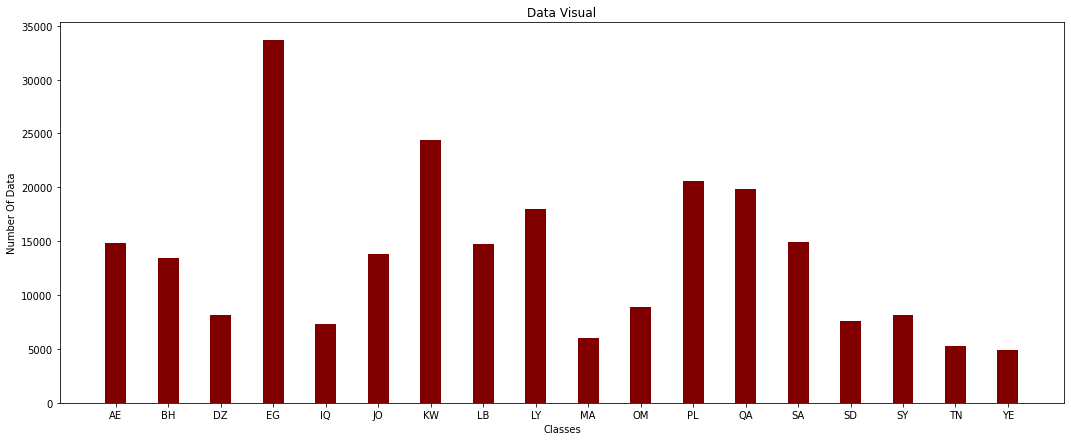

In [14]:
fig = plt.figure(figsize = (18, 7))
 
# creating the bar plot
plt.bar(Classes, NumberOfData_PerClass, color ='maroon',width = 0.4)
 
plt.xlabel("Classes")
plt.ylabel("Number Of Data")
plt.title("Data Visual")
plt.show()

In [15]:
DownSampleTo = int(sum(NumberOfData_PerClass)/len(NumberOfData_PerClass))

In [16]:
X_Downsample = []
Y_Downsample = []
Data_Occ = {}

for i in range(len(X)):
  Sent = X[i]
  Label = Y[i]

  if Label not in Data_Occ.keys():
    Data_Occ[Label] = 1
  else:
    if Data_Occ[Label] < DownSampleTo:
      Data_Occ[Label] += 1
      X_Downsample.append(Sent)
      Y_Downsample.append(Label)


In [17]:
NumberOfData_PerClass = [0]*len(Classes)
for Data in Y_Downsample:
    Index = Classes.index(Data)
    NumberOfData_PerClass[Index] += 1

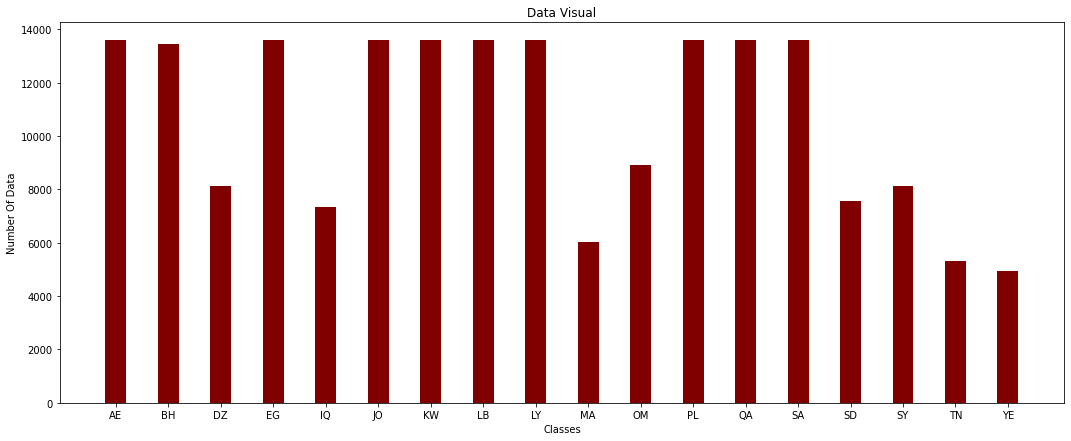

In [18]:
fig = plt.figure(figsize = (18, 7))
 
# creating the bar plot
plt.bar(Classes, NumberOfData_PerClass, color ='maroon',width = 0.4)
 
plt.xlabel("Classes")
plt.ylabel("Number Of Data")
plt.title("Data Visual")
plt.show()

In [19]:
with open('X_Downsample.pkl', 'wb') as f:
    pickle.dump(X_Downsample, f)

    
with open('Y_Downsample.pkl', 'wb') as f:
    pickle.dump(Y_Downsample, f)